In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

In [5]:
df = pd.read_csv("../../data/processed/signalEUR_USD_Labelled_v4_processed.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [32]:
df.head(20)

,Date,Price,Open,High,Low,Change %,diff_1,label,sma,ema,...,macd,macd_s,macd_h,roc,rsi,Bollinger_up,Bollinger_down,cci,diff_n,Momentum
0,2013-01-01,1.3205,1.3194,1.3220,1.3180,0.07%,NaN,1.0,NaN,1.320500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0122,NaN
1,2013-01-02,1.3186,1.3205,1.3302,1.3157,-0.14%,-0.0019,1.0,NaN,1.318956,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.0122,NaN
2,2013-01-03,1.3048,1.3187,1.3192,1.3046,-1.05%,-0.0138,2.0,NaN,1.307931,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0223,NaN
3,2013-01-04,1.3069,1.3048,1.3091,1.2999,0.16%,0.0021,2.0,NaN,1.307136,...,NaN,NaN,NaN,NaN,13.559663,NaN,NaN,NaN,0.0275,NaN
4,2013-01-07,1.3117,1.3072,1.3121,1.3018,0.37%,0.0048,2.0,NaN,1.310649,...,NaN,NaN,NaN,NaN,36.329386,NaN,NaN,NaN,0.0266,99.333586
5,2013-01-08,1.3083,1.3116,1.3142,1.3058,-0.26%,-0.0034,2.0,NaN,1.308842,...,NaN,NaN,NaN,-0.009239,29.893557,NaN,NaN,NaN,0.0221,99.218868
6,2013-01-09,1.3064,1.3081,1.3096,1.3037,-0.15%,-0.0019,2.0,NaN,1.306963,...,NaN,NaN,NaN,-0.009252,26.828964,NaN,NaN,NaN,0.0226,100.122624
7,2013-01-10,1.3271,1.3065,1.3273,1.3039,1.58%,0.0207,2.0,NaN,1.322453,...,NaN,NaN,NaN,0.017091,68.029771,NaN,NaN,NaN,0.0106,101.545642
8,2013-01-11,1.3344,1.3272,1.3366,1.3248,0.55%,0.0073,0.0,NaN,1.331643,...,NaN,NaN,NaN,0.021042,73.989378,NaN,NaN,NaN,-0.0025,101.730579
9,2013-01-14,1.3383,1.3340,1.3404,1.3334,0.29%,0.0039,1.0,NaN,1.336764,...,NaN,NaN,NaN,0.020279,76.670226,NaN,NaN,NaN,-0.0069,102.293052


In [103]:
resp = requests.get("https://openbanking-application.herokuapp.com/fx", 
    params= {
        "token": "f13785bcd296e49e14706164d1983be531492d5c92b3523204812014ae79941a",
        "start": "2021-12-20",
        "end": "2021-12-31"
    }
)

In [104]:
resp_body = resp.json()

In [105]:
resp_df = pd.DataFrame(resp_body)
resp_df["date"] = pd.to_datetime(resp_df["date"])
resp_df = resp_df.set_index("date")

In [106]:
resp_df

,bollinger_down,bollinger_up,cci,change_percent,difference,ema,high,id,label,low,macd,macd_h,open,price,roc,rsi,sma
date,,,,,,,,,,,,,,,,,
2021-12-20 00:00:00+00:00,1.120394,1.136446,-27.330869,0.32,0.0036,1.127084,1.1305,2316,2.0,1.1234,-0.003948,0.000847,1.1242,1.1275,-0.000709,46.839553,1.128420
2021-12-21 00:00:00+00:00,1.120781,1.136429,-9.274996,0.07,0.0008,1.128019,1.1303,2320,0.0,1.1260,-0.003696,0.000879,1.1277,1.1283,0.002310,48.373952,1.128605
2021-12-22 00:00:00+00:00,1.122469,1.136011,47.075103,0.36,0.0041,1.131389,1.1343,2325,2.0,1.1264,-0.003130,0.001156,1.1279,1.1324,0.003456,55.900932,1.129240
2021-12-23 00:00:00+00:00,1.124261,1.135439,77.106303,0.04,0.0004,1.132474,1.1343,2329,0.0,1.1289,-0.002618,0.001334,1.1325,1.1328,0.000000,56.613022,1.129850
2021-12-24 00:00:00+00:00,1.124261,1.135439,73.581941,-0.10,-0.0011,1.131879,1.1344,2333,0.0,1.1303,-0.002276,0.001341,1.1330,1.1317,0.006940,53.853702,1.129850
2021-12-27 00:00:00+00:00,1.124321,1.135719,64.885520,0.07,0.0008,1.132357,1.1335,2336,0.0,1.1302,-0.001917,0.001360,1.1318,1.1325,0.004435,55.666956,1.130020
2021-12-28 00:00:00+00:00,1.124420,1.135350,35.968157,-0.14,-0.0016,1.131236,1.1335,2340,0.0,1.1289,-0.001742,0.001228,1.1329,1.1309,0.002304,51.038878,1.129885
2021-12-29 00:00:00+00:00,1.124199,1.135861,96.397770,0.34,0.0039,1.133978,1.1370,2343,2.0,1.1273,-0.001275,0.001357,1.1310,1.1348,0.002119,60.317695,1.130030
2021-12-30 00:00:00+00:00,1.124232,1.136068,81.244514,-0.22,-0.0025,1.132687,1.1360,2346,1.0,1.1298,-0.001093,0.001231,1.1349,1.1323,-0.000441,52.902228,1.130150


# Updating Database

In [72]:
df.tail(10)

,Date,Price,Open,High,Low,Change %,diff_1,label,sma,ema,...,macd,macd_s,macd_h,roc,rsi,Bollinger_up,Bollinger_down,cci,diff_n,Momentum
2339,2021-12-20,1.1275,1.1242,1.1305,1.1234,0.32%,0.0036,0.0,1.128420,1.127084,...,-0.003948,-0.004795,0.000847,-0.000709,46.839553,1.136446,1.120394,-27.330869,0.0050,100.159901
2340,2021-12-21,1.1283,1.1277,1.1303,1.1260,0.07%,0.0008,0.0,1.128605,1.128019,...,-0.003696,-0.004575,0.000879,0.002310,48.373952,1.136429,1.120781,-9.274996,0.0026,99.982277
2341,2021-12-22,1.1324,1.1279,1.1343,1.1264,0.36%,0.0041,0.0,1.129240,1.131389,...,-0.003130,-0.004286,0.001156,0.003456,55.900932,1.136011,1.122469,47.075103,0.0024,99.964689
2342,2021-12-23,1.1328,1.1325,1.1343,1.1289,0.04%,0.0004,0.0,1.129850,1.132474,...,-0.002618,-0.003952,0.001334,0.000000,56.613022,1.135439,1.124261,77.106303,-0.0005,100.791885
2343,2021-12-24,1.1317,1.1330,1.1344,1.1303,-0.10%,-0.0011,0.0,1.129850,1.131879,...,-0.002276,-0.003617,0.001341,0.006940,53.853702,1.135439,1.124261,73.581941,0.0051,100.372506
2344,2021-12-27,1.1325,1.1318,1.1335,1.1302,0.07%,0.0008,0.0,1.130020,1.132357,...,-0.001917,-0.003277,0.001360,0.004435,55.666956,1.135719,1.124321,64.885520,NaN,100.372241
2345,2021-12-28,1.1309,1.1329,1.1335,1.1289,-0.14%,-0.0016,0.0,1.129885,1.131236,...,-0.001742,-0.002970,0.001228,0.002304,51.038878,1.135350,1.124420,35.968157,NaN,99.867538
2346,2021-12-29,1.1348,1.1310,1.1370,1.1273,0.34%,0.0039,0.0,1.130030,1.133978,...,-0.001275,-0.002631,0.001357,0.002119,60.317695,1.135861,1.124199,96.397770,NaN,100.176554
2347,2021-12-30,1.1323,1.1349,1.1360,1.1298,-0.22%,-0.0025,0.0,1.130150,1.132687,...,-0.001093,-0.002323,0.001231,-0.000441,52.902228,1.136068,1.124232,81.244514,NaN,100.053018
2348,2021-12-31,1.1368,1.1324,1.1387,1.1302,0.40%,0.0045,0.0,1.130425,1.135851,...,-0.000579,-0.001974,0.001396,0.004506,62.481977,1.137039,1.123811,133.875356,NaN,100.379691


In [129]:
resp = requests.get("https://openbanking-application.herokuapp.com/fx", 
    params= {
        "token": "f13785bcd296e49e14706164d1983be531492d5c92b3523204812014ae79941a",
        "start": "2021-12-20",
        "end": "2021-12-31"
    }
)
resp_body = resp.json()
resp_df = pd.DataFrame(resp_body)
resp_df["date"] = pd.to_datetime(resp_df["date"])
resp_df = resp_df.set_index("date")
resp_df

,bollinger_down,bollinger_up,cci,change_percent,difference,ema,high,id,label,low,macd,macd_h,open,price,roc,rsi,sma
date,,,,,,,,,,,,,,,,,
2021-12-20 00:00:00+00:00,1.120394,1.136446,-27.330869,0.32,0.0050,1.127084,1.1305,2525,0.0,1.1234,-0.003948,0.000847,1.1242,1.1275,-0.000709,46.839553,1.128420
2021-12-21 00:00:00+00:00,1.120781,1.136429,-9.274996,0.07,0.0026,1.128019,1.1303,2526,0.0,1.1260,-0.003696,0.000879,1.1277,1.1283,0.002310,48.373952,1.128605
2021-12-22 00:00:00+00:00,1.122469,1.136011,47.075103,0.36,0.0024,1.131389,1.1343,2527,0.0,1.1264,-0.003130,0.001156,1.1279,1.1324,0.003456,55.900932,1.129240
2021-12-23 00:00:00+00:00,1.124261,1.135439,77.106303,0.04,-0.0005,1.132474,1.1343,2528,0.0,1.1289,-0.002618,0.001334,1.1325,1.1328,0.000000,56.613022,1.129850
2021-12-24 00:00:00+00:00,1.124261,1.135439,73.581941,-0.10,0.0051,1.131879,1.1344,2529,0.0,1.1303,-0.002276,0.001341,1.1330,1.1317,0.006940,53.853702,1.129850
2021-12-27 00:00:00+00:00,1.124321,1.135719,64.885520,0.07,NaN,1.132357,1.1335,2530,0.0,1.1302,-0.001917,0.001360,1.1318,1.1325,0.004435,55.666956,1.130020
2021-12-28 00:00:00+00:00,1.124420,1.135350,35.968157,-0.14,NaN,1.131236,1.1335,2531,0.0,1.1289,-0.001742,0.001228,1.1329,1.1309,0.002304,51.038878,1.129885
2021-12-29 00:00:00+00:00,1.124199,1.135861,96.397770,0.34,NaN,1.133978,1.1370,2532,0.0,1.1273,-0.001275,0.001357,1.1310,1.1348,0.002119,60.317695,1.130030
2021-12-30 00:00:00+00:00,1.124232,1.136068,81.244514,-0.22,NaN,1.132687,1.1360,2533,0.0,1.1298,-0.001093,0.001231,1.1349,1.1323,-0.000441,52.902228,1.130150


In [131]:
# row = df.iloc[2343]
# row

In [132]:
# row["Date"].strftime('%Y-%m-%d')

In [133]:


# payload = {
#     "token": "f13785bcd296e49e14706164d1983be531492d5c92b3523204812014ae79941a",
#     "date": row["Date"].strftime('%Y-%m-%d'),
#     "price": str(row["Price"]),
#     "open": str(row["Open"]),
#     "high": str(row["High"]),
#     "low": str(row["Low"]),
#     "change_percent": str(row["Change %"]),
#     "difference": str(row["diff_n"]),
#     "label": str(row["label"]),
#     "sma": str(row["sma"]),
#     "ema": str(row["ema"]),
#     "macd": str(row["macd"]),
#     "macd_s": str(row["macd_s"]),
#     "macd_h": str(row["macd_h"]),
#     "roc": str(row["roc"]),
#     "rsi": str(row["rsi"]),
#     "bollinger_up": str(row["Bollinger_up"]),
#     "bollinger_down": str(row["Bollinger_down"]),
#     "cci": str(row["cci"])
# }

In [134]:
# payload

In [135]:
# resp = requests.post("https://openbanking-application.herokuapp.com/data", json=payload)

In [117]:
# resp.text

'Forex Data Added. data id=2524'

In [121]:
# resp.status_code

200

In [113]:
def get_payload(row):
    payload = {
        "token": "f13785bcd296e49e14706164d1983be531492d5c92b3523204812014ae79941a",
        "date": row["Date"].strftime('%Y-%m-%d'),
        "price": str(row["Price"]),
        "open": str(row["Open"]),
        "high": str(row["High"]),
        "low": str(row["Low"]),
        "change_percent": str(row["Change %"]),
        "difference": str(row["diff_n"]),
        "label": str(row["label"]),
        "sma": str(row["sma"]),
        "ema": str(row["ema"]),
        "macd": str(row["macd"]),
        "macd_s": str(row["macd_s"]),
        "macd_h": str(row["macd_h"]),
        "roc": str(row["roc"]),
        "rsi": str(row["rsi"]),
        "bollinger_up": str(row["Bollinger_up"]),
        "bollinger_down": str(row["Bollinger_down"]),
        "cci": str(row["cci"])
    }
    return payload

In [130]:
df.iloc[:]

,Date,Price,Open,High,Low,Change %,diff_1,label,sma,ema,...,macd,macd_s,macd_h,roc,rsi,Bollinger_up,Bollinger_down,cci,diff_n,Momentum
0,2013-01-01,1.3205,1.3194,1.3220,1.3180,0.07%,NaN,1.0,NaN,1.320500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0122,NaN
1,2013-01-02,1.3186,1.3205,1.3302,1.3157,-0.14%,-0.0019,1.0,NaN,1.318956,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.0122,NaN
2,2013-01-03,1.3048,1.3187,1.3192,1.3046,-1.05%,-0.0138,2.0,NaN,1.307931,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0223,NaN
3,2013-01-04,1.3069,1.3048,1.3091,1.2999,0.16%,0.0021,2.0,NaN,1.307136,...,NaN,NaN,NaN,NaN,13.559663,NaN,NaN,NaN,0.0275,NaN
4,2013-01-07,1.3117,1.3072,1.3121,1.3018,0.37%,0.0048,2.0,NaN,1.310649,...,NaN,NaN,NaN,NaN,36.329386,NaN,NaN,NaN,0.0266,99.333586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,2021-12-27,1.1325,1.1318,1.1335,1.1302,0.07%,0.0008,0.0,1.130020,1.132357,...,-0.001917,-0.003277,0.001360,0.004435,55.666956,1.135719,1.124321,64.885520,NaN,100.372241
2345,2021-12-28,1.1309,1.1329,1.1335,1.1289,-0.14%,-0.0016,0.0,1.129885,1.131236,...,-0.001742,-0.002970,0.001228,0.002304,51.038878,1.135350,1.124420,35.968157,NaN,99.867538
2346,2021-12-29,1.1348,1.1310,1.1370,1.1273,0.34%,0.0039,0.0,1.130030,1.133978,...,-0.001275,-0.002631,0.001357,0.002119,60.317695,1.135861,1.124199,96.397770,NaN,100.176554
2347,2021-12-30,1.1323,1.1349,1.1360,1.1298,-0.22%,-0.0025,0.0,1.130150,1.132687,...,-0.001093,-0.002323,0.001231,-0.000441,52.902228,1.136068,1.124232,81.244514,NaN,100.053018


In [128]:
for idx, row in df.iloc[:].iterrows():
    payload = get_payload(row)
    resp = requests.post("https://openbanking-application.herokuapp.com/data", json=payload)
    if resp.status_code != 200:
        print(f"Failed {idx} {payload['date']}")
        break
    print(f"Updated {idx} {payload['date']}")
        

Updated 2339 2021-12-20
Updated 2340 2021-12-21
Updated 2341 2021-12-22
Updated 2342 2021-12-23
Updated 2343 2021-12-24
Updated 2344 2021-12-27
Updated 2345 2021-12-28
Updated 2346 2021-12-29
Updated 2347 2021-12-30
Updated 2348 2021-12-31


In [85]:
resp = requests.get("https://openbanking-application.herokuapp.com/fx", params={
        "token": "f13785bcd296e49e14706164d1983be531492d5c92b3523204812014ae79941a",
        "start": "2019-01-02",
        "end": "2019-10-03"
    }
)

In [87]:
resp_body = resp.json()

In [88]:
resp_body

[{'bollinger_down': 1.1289636771994,
  'bollinger_up': 1.1472963228006001,
  'cci': 1.9606184544478222,
  'change_percent': -1.06,
  'date': 'Wed, 02 Jan 2019 00:00:00 GMT',
  'difference': -0.0121,
  'ema': 1.137077880326986,
  'high': 1.1499,
  'id': 1582,
  'label': 1.0,
  'low': 1.1325,
  'macd': 0.0011737664281146198,
  'macd_h': 0.0004985248937836516,
  'open': 1.1464,
  'price': 1.1343,
  'roc': -0.0008808244516866819,
  'rsi': 40.52323118986941,
  'sma': 1.13813},
 {'bollinger_down': 1.129040251121394,
  'bollinger_up': 1.147399748878606,
  'cci': -27.620148241533663,
  'change_percent': 0.45,
  'date': 'Thu, 03 Jan 2019 00:00:00 GMT',
  'difference': 0.0050999999999998,
  'ema': 1.1388641262293044,
  'high': 1.1413,
  'id': 1586,
  'label': 2.0,
  'low': 1.1309,
  'macd': 0.001041840733832844,
  'macd_h': 0.0002932793596015005,
  'open': 1.1345,
  'price': 1.1394,
  'roc': -0.00314960629921264,
  'rsi': 49.59962969597501,
  'sma': 1.13822},
 {'bollinger_down': 1.12911015590695

### Label with diff_n

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("../../data/processed/oanda_backtest_data_v1.csv")

In [28]:
df["Date"] = pd.to_datetime(df["Date"])

In [29]:
df["diff_1"] = df["Price"] - df["Price"].shift(1)

In [30]:
df

,Date,Open,High,Low,Price,Volume,Complete,Bid_c,Ask_c,sma,...,roc,rsi,Bollinger_up,Bollinger_down,cci,Momentum,Bollinger,price_sma,price_ema,diff_1
0,2020-01-19 22:00:00,1.10930,1.11026,1.10766,1.10950,22822,True,1.10937,1.10962,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,2020-01-20 22:00:00,1.10945,1.11180,1.10811,1.10822,38986,True,1.10812,1.10833,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.000240,-0.00128
2,2020-01-21 22:00:00,1.10867,1.10984,1.10702,1.10936,41211,True,1.10912,1.10959,NaN,...,NaN,50.681683,NaN,NaN,NaN,NaN,NaN,NaN,0.000199,0.00114
3,2020-01-22 22:00:00,1.10932,1.11088,1.10364,1.10563,58325,True,1.10513,1.10613,NaN,...,NaN,17.396136,NaN,NaN,NaN,NaN,NaN,NaN,-0.000807,-0.00373
4,2020-01-23 22:00:00,1.10558,1.10618,1.10198,1.10252,46040,True,1.10222,1.10282,NaN,...,NaN,10.660470,NaN,NaN,NaN,99.370888,NaN,NaN,-0.000902,-0.00311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2021-12-19 22:00:00,1.12380,1.13040,1.12347,1.12766,63918,True,1.12757,1.12775,1.128616,...,-0.000851,46.862006,1.136576,1.120657,-27.585639,100.170554,-0.060085,-0.000956,0.000485,0.00406
499,2021-12-20 22:00:00,1.12849,1.13026,1.12608,1.12841,54860,True,1.12832,1.12850,1.128791,...,0.002372,48.256950,1.136560,1.121022,-9.278133,99.905266,-0.024520,-0.000381,0.000285,0.00075
500,2021-12-21 22:00:00,1.12864,1.13425,1.12644,1.13276,52085,True,1.13266,1.13285,1.129425,...,0.002904,55.988907,1.136208,1.122642,48.790505,99.973523,0.245837,0.003335,0.001070,0.00435
501,2021-12-22 22:00:00,1.13265,1.13424,1.12902,1.13275,50018,True,1.13264,1.13286,1.130016,...,-0.000274,55.966724,1.135641,1.124392,75.487036,100.814347,0.243002,0.002733,0.000245,-0.00001


In [31]:
THRESHOLD = 0.0055

In [32]:
N_AHEAD = 5

df["diff_n"] = np.nan

MAX_IDX = df.index[-1]

for idx, row in df.iterrows():

    label_idx = idx + N_AHEAD

    if idx <= MAX_IDX and label_idx <= MAX_IDX:
        diff = df.loc[label_idx, "Price"] - df.loc[idx, "Price"]
        df.loc[idx, "diff_n"] = diff

In [33]:
diff_n = df["diff_n"]

idx_increase = diff_n[diff_n> THRESHOLD ].index
idx_decrease = diff_n[diff_n < -THRESHOLD].index

In [34]:
# Increase
df.loc[idx_increase, "label"] = 2

# Decrease
df.loc[idx_decrease, "label"] = 1

# No significant change
df.loc[~df.index.isin(idx_increase.union(idx_decrease)), "label"] = 0

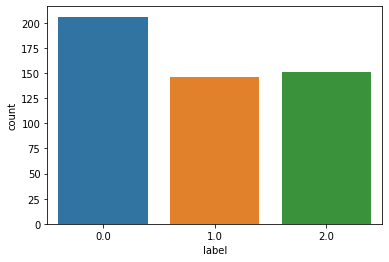

In [35]:
sns.countplot(x = "label", data=df)
plt.show()

In [36]:
output_path = os.path.relpath("../../data/processed/oanda_backtest_data_labelled_v1.csv")
output_path

'../../data/processed/oanda_backtest_data_labelled_v1.csv'

In [37]:
df.to_csv(output_path, header=True, index=False)